In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# data of movie
df_movie=pd.read_csv('movies.dat', sep = '::', engine='python', encoding='latin1')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
df_movie.shape

(3882, 3)

In [6]:
#Data acquisition of the rating dataset
df_rating = pd.read_csv("ratings.dat",sep='::', engine='python', encoding='latin1')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3.0,978302109.0
1,1,914,3.0,978301968.0
2,1,3408,4.0,978300275.0
3,1,2355,5.0,978824291.0
4,1,1197,3.0,978302268.0


In [7]:
df_rating.shape

(260829, 4)

In [8]:
#Data acquisition of the users dataset
df_user = pd.read_csv("users.dat",sep='::',engine='python', encoding='latin1')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [9]:
df_user.shape

(6039, 5)

In [10]:
# Merge User and Ratings data on 'MovieID'
User_ratings = pd.merge(df_user, df_rating, left_on='UserID', right_on='ID')

# Display the merged DataFrame
User_ratings.head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp
0,2,M,56,16,70072,2,1357,5.0,978298709.0
1,2,M,56,16,70072,2,3068,4.0,978299000.0
2,2,M,56,16,70072,2,1537,4.0,978299620.0
3,2,M,56,16,70072,2,647,3.0,978299351.0
4,2,M,56,16,70072,2,2194,4.0,978299297.0


In [11]:
df = pd.merge(User_ratings, df_movie, left_on='MovieID', right_on='MovieIDs')
df.head()

,UserID,Gender,Age,Occupation,Zip-code,ID,MovieID,Ratings,TimeStamp,MovieIDs,MovieName,Category
0,2,M,56,16,70072,2,1357,5.0,978298709.0,1357,Shine (1996),Drama|Romance
1,8,M,25,12,11413,8,1357,4.0,978230800.0,1357,Shine (1996),Drama|Romance
2,10,F,35,1,95370,10,1357,5.0,978227625.0,1357,Shine (1996),Drama|Romance
3,18,F,18,3,95825,18,1357,5.0,978156876.0,1357,Shine (1996),Drama|Romance
4,33,M,45,3,55421,33,1357,4.0,978109488.0,1357,Shine (1996),Drama|Romance


In [12]:
df = df.drop(['ID', 'MovieIDs'], axis= 1)

In [13]:
df.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Ratings,TimeStamp,MovieName,Category
0,2,M,56,16,70072,1357,5.0,978298709.0,Shine (1996),Drama|Romance
1,8,M,25,12,11413,1357,4.0,978230800.0,Shine (1996),Drama|Romance
2,10,F,35,1,95370,1357,5.0,978227625.0,Shine (1996),Drama|Romance
3,18,F,18,3,95825,1357,5.0,978156876.0,Shine (1996),Drama|Romance
4,33,M,45,3,55421,1357,4.0,978109488.0,Shine (1996),Drama|Romance


In [14]:
df.shape

(260238, 10)

In [15]:
df.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
MovieID       0
Ratings       0
TimeStamp     0
MovieName     0
Category      0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260238 entries, 0 to 260237
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UserID      260238 non-null  int64  
 1   Gender      260238 non-null  object 
 2   Age         260238 non-null  int64  
 3   Occupation  260238 non-null  int64  
 4   Zip-code    260238 non-null  object 
 5   MovieID     260238 non-null  int64  
 6   Ratings     260238 non-null  float64
 7   TimeStamp   260238 non-null  float64
 8   MovieName   260238 non-null  object 
 9   Category    260238 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 21.8+ MB


In [17]:
df.describe()

,UserID,Age,Occupation,MovieID,Ratings,TimeStamp
count,260238.000000,260238.000000,260238.000000,260238.000000,260238.000000,2.602380e+05
mean,822.118680,28.902981,8.228998,1882.669330,3.558885,9.788834e+08
std,448.829665,12.042105,6.631345,1106.571991,1.128517,1.041546e+07
min,2.000000,1.000000,0.000000,2.000000,1.000000,9.747334e+08
25%,438.000000,18.000000,2.000000,1033.000000,3.000000,9.749778e+08
50%,846.000000,25.000000,7.000000,1876.000000,4.000000,9.757810e+08
75%,1203.000000,35.000000,14.000000,2794.000000,4.000000,9.770287e+08
max,1594.000000,56.000000,20.000000,3952.000000,5.000000,1.046389e+09


In [18]:
df.nunique()

UserID          1593
Gender             2
Age                7
Occupation        21
Zip-code        1193
MovieID         3543
Ratings            5
TimeStamp     120455
MovieName       3543
Category         301
dtype: int64

In [19]:
# drop zip-code and timestamps

df = df.drop(['Zip-code', 'TimeStamp'], axis= 1)

In [20]:
df.head()

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
0,2,M,56,16,1357,5.0,Shine (1996),Drama|Romance
1,8,M,25,12,1357,4.0,Shine (1996),Drama|Romance
2,10,F,35,1,1357,5.0,Shine (1996),Drama|Romance
3,18,F,18,3,1357,5.0,Shine (1996),Drama|Romance
4,33,M,45,3,1357,4.0,Shine (1996),Drama|Romance


# EDA

#### movie count vs rating

In [21]:
# movie count vs ratings
rating_count = df.groupby('MovieID')['Ratings'].count()
rating_count.sort_values(ascending=False)

MovieID
2858    967
1196    784
480     779
260     771
1210    762
       ... 
1386      1
834       1
826       1
2277      1
2984      1
Name: Ratings, Length: 3543, dtype: int64

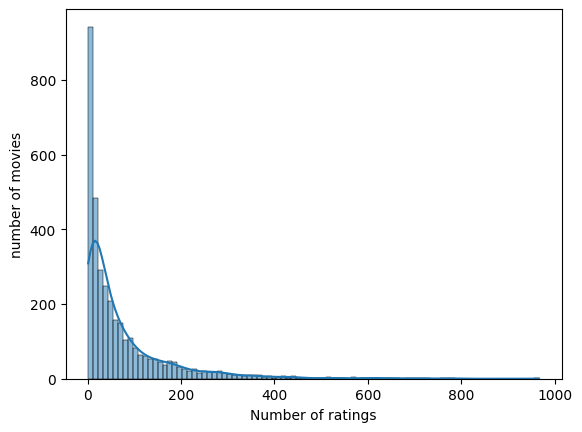

In [22]:
sns.histplot(rating_count, kde=True)
plt.xlabel('Number of ratings')
plt.ylabel('number of movies')
plt.show()

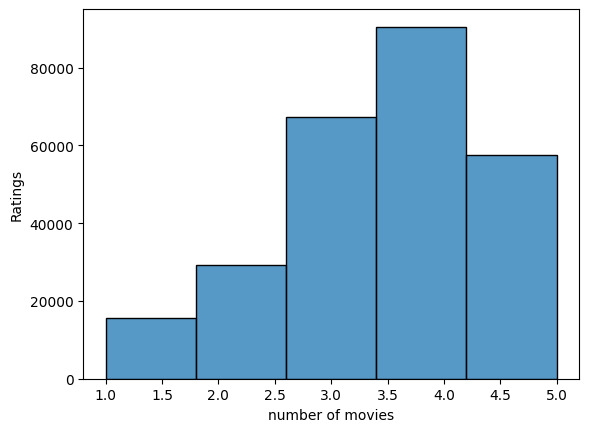

In [23]:
# rating vs movie count
sns.histplot(data = df, x='Ratings', bins=5, binrange=(1,5))
plt.xlabel('number of movies')
plt.ylabel('Ratings')
plt.show()

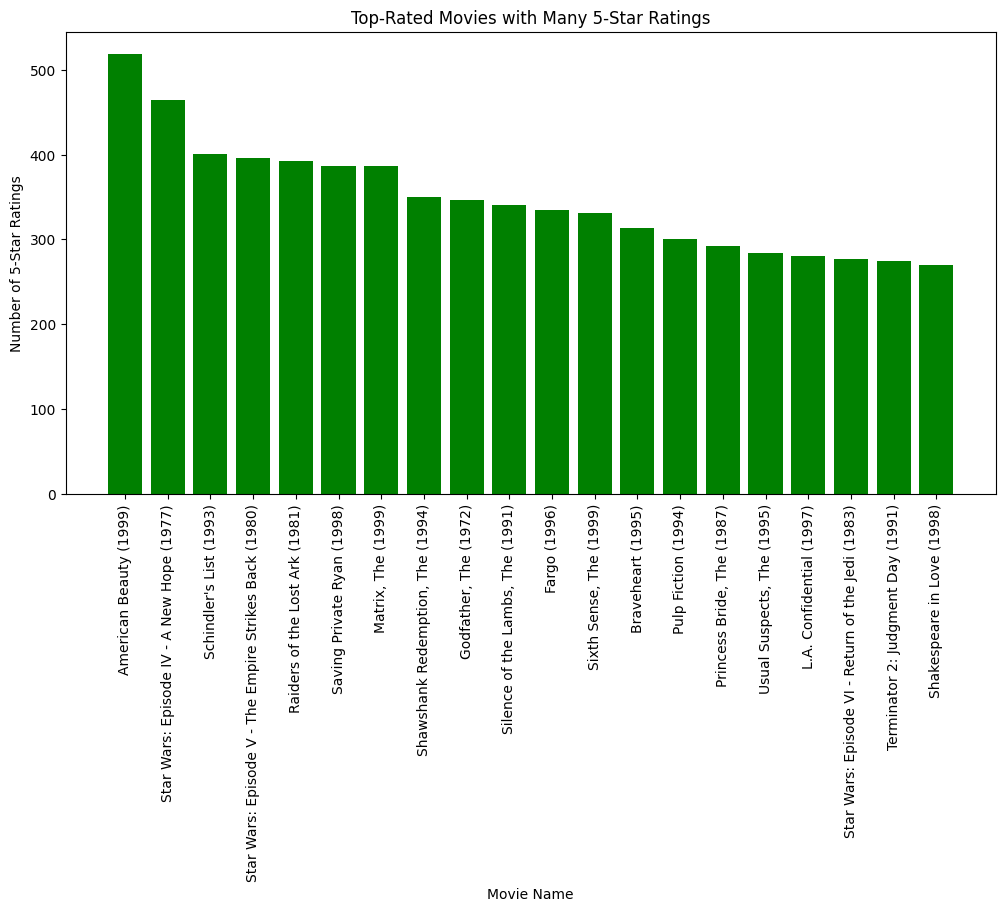

In [24]:
# Group by movie MovieName and count 5-star ratings
movie_ratings = df[df['Ratings'] == 5].groupby('MovieName')['Ratings'].count().reset_index()

# Movies with the highest ratings
top_rated_movies = movie_ratings.sort_values(by='Ratings', ascending=False)

# bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['MovieName'][:20], top_rated_movies['Ratings'][:20], color='g')
plt.xlabel('Movie Name')
plt.ylabel('Number of 5-Star Ratings')
plt.title('Top-Rated Movies with Many 5-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

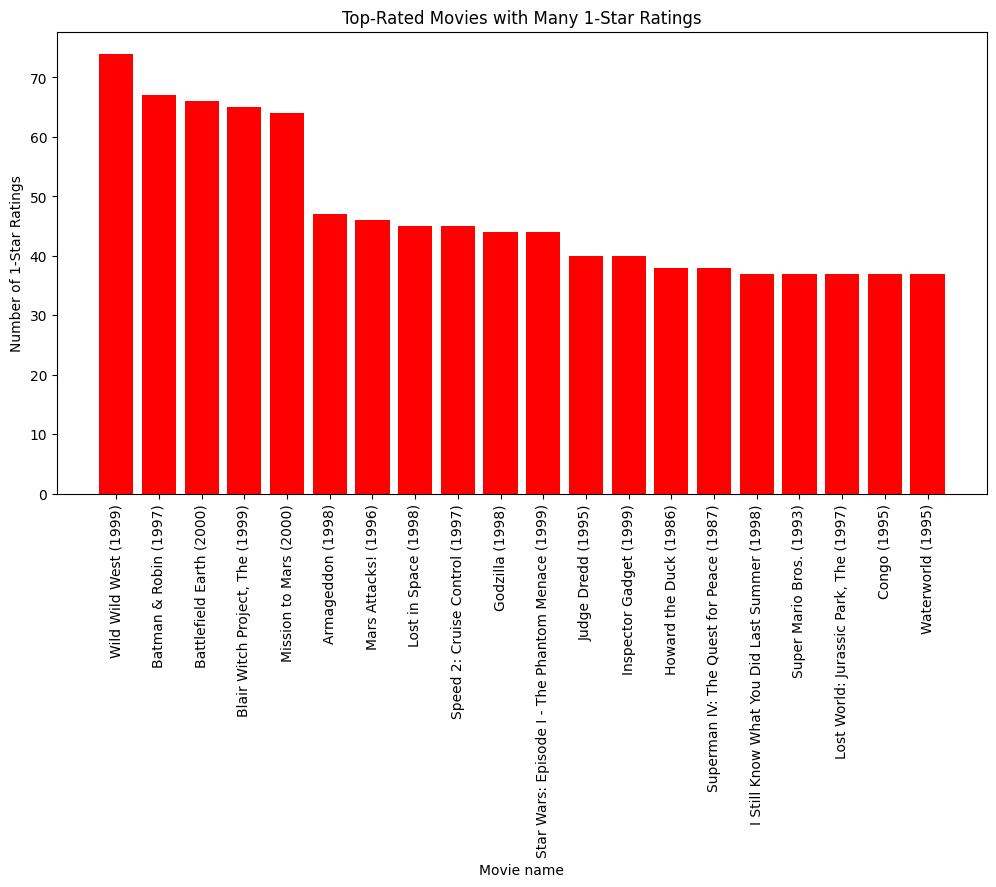

In [25]:
# Group by movie MovieName and count 1-star ratings
movie_ratings = df[df['Ratings'] == 1].groupby('MovieName')['Ratings'].count().reset_index()

# Movies with the highest ratings
top_rated_movies = movie_ratings.sort_values(by='Ratings', ascending=False)

# bar plot for the top-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_rated_movies['MovieName'][:20], top_rated_movies['Ratings'][:20], color='r')
plt.xlabel('Movie name')
plt.ylabel('Number of 1-Star Ratings')
plt.title('Top-Rated Movies with Many 1-Star Ratings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [26]:
df.Category.value_counts()

Comedy                       30822
Drama                        29281
Comedy|Romance               11513
Comedy|Drama                 11288
Drama|Romance                 7991
                             ...  
Action|Comedy|Crime              9
Adventure|Musical|Romance        9
Comedy|Film-Noir|Thriller        1
Fantasy                          1
Film-Noir|Horror                 1
Name: Category, Length: 301, dtype: int64

In [27]:
# df = df[~df[df['Category']=='Film-Noir|Horror']]
df = df[~df['Category'].str.contains('Film-Noir|Horror')]
df.Category.value_counts()

Comedy                       30822
Drama                        29281
Comedy|Romance               11513
Comedy|Drama                 11288
Drama|Romance                 7991
                             ...  
Drama|Romance|Western            9
Children's|Fantasy               9
Action|Comedy|Crime              9
Adventure|Musical|Romance        9
Fantasy                          1
Name: Category, Length: 254, dtype: int64

In [28]:
 df.columns

Index(['UserID', 'Gender', 'Age', 'Occupation', 'MovieID', 'Ratings',
       'MovieName', 'Category'],
      dtype='object')

# User-Based Collaborative Filtering

User-Based Collaborative Filtering (UBCF) is a recommendation technique that provides personalized recommendations to users based on the historical behavior and preferences of other users who are similar to them. UBCF assumes that users who have interacted with items in similar ways (e.g., rated movies similarly) are likely to have similar tastes and can benefit from recommendations made to each other.

In [49]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Define the user-based collaborative filtering model
sim_options = {
    'user_based': True,  # Use user-based collaborative filtering
    'name': 'cosine',
}
model = KNNBasic(sim_options=sim_options)

# Fit the model on the training data
model.fit(trainset)

# Predict ratings on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9761
RMSE: 0.9760578639529492


In [50]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
258497,337,M,18,19,2810,5.0,Perfect Blue (1997),Animation|Mystery
3974,660,M,45,16,1213,3.0,GoodFellas (1990),Crime|Drama
2635,1260,M,25,17,2916,4.0,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller


In [51]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")

337
Perfect Blue
Predicted rating for user 337 and movie Perfect Blue: 3.577723235774852


# Item-Based Collaborative Filtering

Item-Based Collaborative Filtering (IBCF) is a recommendation technique that suggests items (e.g., movies) to users based on the similarity of items rather than users. In IBCF, the idea is to recommend items that are similar to the ones the user has interacted with in the past. This method leverages the assumption that users who liked or interacted with one item are likely to appreciate items that are similar to it.

In [37]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

In [38]:
# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Define the item-based collaborative filtering model
sim_options = {
    'user_based': False,  # Use item-based collaborative filtering
    'name': 'cosine',
}
model = KNNBasic(sim_options=sim_options)

# Fit the model on the training data
model.fit(trainset)

# Predict ratings on the test set
predictions = model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0188
RMSE: 1.0188117803827752


In [44]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
230576,1354,F,25,2,1054,5.0,Get on the Bus (1996),Drama
50454,543,M,25,5,39,4.0,Clueless (1995),Comedy|Romance
141522,366,M,50,15,3194,5.0,"Way We Were, The (1973)",Drama


In [46]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")

366
Way we were, the
Predicted rating for user 366 and movie Way we were, the: 3.5796804003194937


# Matrix Factorization Techniques

Matrix Factorization is a class of techniques used in recommendation systems and data analysis that factorizes a matrix into multiple matrices to capture latent features and relationships between data points. Matrix factorization methods are widely used in collaborative filtering-based recommendation systems.

In [52]:
# Import necessary libraries
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

In [53]:
# Load data into Surprise Dataset
data = df
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(data[['UserID', 'MovieName', 'Ratings']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Hyperparameter tuning (example: tuning n_factors)
param_grid = {'n_factors': [10, 20, 30]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)

# Get the best model
best_model = gs.best_estimator['rmse']

# Train the best model
best_model.fit(trainset)

# Predict ratings on the test set
predictions = best_model.test(testset)

# Evaluate the model using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.9006
RMSE: 0.9006246203620982


In [54]:
df.sample(3)

,UserID,Gender,Age,Occupation,MovieID,Ratings,MovieName,Category
160947,591,M,25,0,1805,2.0,Wild Things (1998),Crime|Drama|Mystery|Thriller
114182,887,F,56,16,1271,3.0,Fried Green Tomatoes (1991),Drama
92378,1377,M,35,16,527,4.0,Schindler's List (1993),Drama|War


In [56]:
# Testing on custom data
user_id_to_predict = int(input())  # Replace with a user ID from your dataset
movie_name_to_predict = input()  # Replace with a movie name
custom_prediction = best_model.predict(user_id_to_predict, movie_name_to_predict).est
print(f"Predicted rating for user {user_id_to_predict} and movie {movie_name_to_predict}: {custom_prediction}")

1377
Schindler's List
Predicted rating for user 1377 and movie Schindler's List: 3.0336161335995446


# conclusion

The choice of which recommendation algorithm is "best" depends on several factors, including the nature of your dataset, your specific use case, and your evaluation criteria. Each of the three algorithms you've asked about—User-Based Collaborative Filtering, Item-Based Collaborative Filtering, and Content-Based Filtering—has its own strengths and weaknesses. Here's a summary:

- User-Based Collaborative Filtering:

   -  Pros
    Effective at capturing user preferences based on similar users.
Doesn't require knowledge of item characteristics.
   - Cons:
Can suffer from the "cold start" problem, where it's challenging to recommend items to new users.
Scalability can be an issue when dealing with a large number of users.
- Item-Based Collaborative Filtering:
  - Pros:
    Can provide high-quality recommendations by identifying items similar to those a user has interacted with.
Handles the "cold start" problem for new items.
  - Cons:
Still prone to scalability issues with a large number of items.
May not work well for diverse item catalogs.
- Content-Based Filtering:

 - Pros:
Recommends items based on item characteristics, making it suitable for diverse item catalogs.
Doesn't require user-item interaction data, making it useful for new users.
 - Cons:
Lacks serendipity, as it recommends items similar to what a user has already seen.
Highly dependent on the quality of item features.